In [1]:
from backend import *
from manipulateData import *
import pandas as pd

In [2]:
config_data = backend.load_data(r"config.json")
data = backend.load_data(r"data_update.json")

In [3]:
file_one = "..\data\RAW_8AgenciesCombined_2NDCohort.xlsx"
file_two = "..\data\RAW_9th District Court Service Unit.xlsx"

In [4]:
file = "..\data\RAW_WJCC Juvenile and Domestic Relations District Court.xlsx"

In [5]:
df = pd.read_excel(file)

In [6]:
trans_df = backend.transform_df(df, data)

Manipulating data...
Unnecessary columns are removed.
Agency columns are renamed.
Unnamed columns are renamed.
Renamed long columns
Removed all-nan value columns.
Checking any comments columns were removed...
No comment columns were removed
3E Restoration
9th District Court Services Unit
Advancing Community Excellence
American Addiction Treatment Center
Avalon Center
Bacon Street Youth & Family Services
Center for Child and Family Services
Child Development Resources
Colonial Behavioral Health
Colonial CASA
Dream Catchers
EVA Homebirth, LLC
Family Matters Services, LLC
Free Spirit Counseling
Grove Christian Outreach Center
Heat Foundation
James City County Colonial Community Corrections
James City County Dept. of Social Services
James City County Fire Department/EMS
James City County Police Department
Lackey Clinic
Peace 'in' It Counseling
Peninsula Agency on Aging
Peninsula Health District
Poquoson City Schools
Riverside Doctor's Hospital Williamsburg
Sentara Williamsburg Regional Med

In [7]:
trans_df.head(1)

,Respondent ID,Collector ID,IP Address,Start Date,End Date,Agency,Department/Program/Unit,"Agency guiding principles and strategic plans (vision, mission and goals) reflect a commitment to providing trauma-informed services and supports.",The program has written policies that are supportive of trauma informed approaches and demonstrate a commitment and respect for cultural differences.,Agency leadership understand the value and have specific training and background in trauma informed care.,...,Staff demonstrate open and respectful communication with all service recipients by: Including the service recipient in all aspects of decision making.,"Staff demonstrate open and respectful communication with all service recipients by: Using open-ended questions, affirmations, reflective listening.",Staff demonstrate open and respectful communication with all service recipients by: Informing service recipients of processes and procedures so that they can anticipate and be prepared for services.,Comment 7,"Staff show acceptance of cultural, ethnic, religious, linguistic and other differences.",Comment 8,Staff prioritize consumer safety to avoid re-traumatization and support resilience.,Reassessment of consumer needs is done on an on-going and individualized basis.,The agency has the capacity to provide or make a timely referral to a continuum of trauma informed services and supports.,Comment 9
0,114450159225,428017376,72.218.86.225,2023-10-30 20:58:11,2023-10-30 21:18:52,WJCC Juvenile and Domestic Relations District ...,,Moderately,Moderately,Moderately,...,Moderately,Significantly,Fully,,Significantly,,Significantly,Significantly,Significantly,


In [8]:
tmp_df = manipulateData.get_tmp_df(trans_df, data, "Policy Review/Governance and Leadership")

In [9]:
question_df = manipulateData.get_question_df(data, data["question_columns"], tmp_df, "Policy Review/Governance and Leadership")

[['Agency guiding principles and strategic plans (vision, mission and goals) reflect a commitment to providing trauma-informed services and supports.', 0, 0, 0, 2, 1, 3], ['The program has written policies that are supportive of trauma informed approaches and demonstrate a commitment and respect for cultural differences.', 0, 0, 0, 3, 0, 3], ['Agency leadership understand the value and have specific training and background in trauma informed care.', 1, 1, 0, 2, 0, 2], ['Agency leaders discuss trauma-informed care in internal agency meetings and in public forums.', 1, 0, 3, 0, 0, 2]]
7


In [19]:
question_df

,Questions,Do Not Know,Fully,Minimally,Moderately,N/A to My Role,Significantly
0,Agency guiding principles and strategic plans ...,0,0,0,2,1,3
1,The program has written policies that are supp...,0,0,0,3,0,3
2,Agency leadership understand the value and hav...,1,1,0,2,0,2
3,Agency leaders discuss trauma-informed care in...,1,0,3,0,0,2


In [10]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

In [59]:
questions = question_df["Questions"]
categories = question_df.columns[1:-1]
fig = go.Figure()
fig = make_subplots(rows=1, cols=len(df))

# Adding traces for each question
for i, question in enumerate(question_df['Questions']):
    values = question_df.loc[question_df['Questions'] == question, categories].values.flatten()
    text_values = [str(val) if val != 0 else "0" for val in values]  # Replace zero values with "0"
    trace = go.Bar(
        x=categories,
        y=values,
        text=text_values,
        textposition='auto',
        name=question
    )
    fig.add_trace(trace, row=1, col=i+1)

    

fig.update_layout(
    title='Grouped Bar Chart',
    barmode='group',
    autosize=False,
    legend=dict(x=0, y=-0.5),
    width=1800,
    height=600
)
fig.show()

In [32]:
df_one = pd.read_excel(file_one)
df_two = pd.read_excel(file_two)

In [33]:
trans_one = backend.transform_df(df_one, data)
trans_one.head()

Manipulating data...
Unnecessary columns are removed.
Agency columns are renamed.
Unnamed columns are renamed.
Renamed long columns
Removed all-nan value columns.
Child Development Resources
Colonial Behavioral Health
Colonial CASA
Family Matters Services, LLC
Grove Christian Outreach Center
Lackey Clinic
Peninsula Agency on Aging
Williamsburg-James City County Schools
Williamsburg Police Department
Combined all agency columns into one.
Combined the same name columns


,Respondent ID,Collector ID,IP Address,Start Date,End Date,Agency,Department/Program/Unit,"Agency guiding principles and strategic plans (vision, mission and goals) reflect a commitment to providing trauma-informed services and supports.",The program has written policies that are supportive of trauma informed approaches and demonstrate a commitment and respect for cultural differences.,Agency leadership understand the value and have specific training and background in trauma informed care.,...,Staff demonstrate open and respectful communication with all service recipients by: Including the service recipient in all aspects of decision making.,"Staff demonstrate open and respectful communication with all service recipients by: Using open-ended questions, affirmations, reflective listening.",Staff demonstrate open and respectful communication with all service recipients by: Informing service recipients of processes and procedures so that they can anticipate and be prepared for services.,Comment 7,"Staff show acceptance of cultural, ethnic, religious, linguistic and other differences.",Comment 8,Staff prioritize consumer safety to avoid re-traumatization and support resilience.,Reassessment of consumer needs is done on an on-going and individualized basis.,The agency has the capacity to provide or make a timely referral to a continuum of trauma informed services and supports.,Comment 9
0,114565722646,429877496,216.54.0.107,2024-03-29 17:01:55,2024-03-29 17:07:00,Peninsula Agency on Aging,Transportation,Fully,Fully,Fully,...,Fully,Fully,Fully,,Fully,,Fully,Fully,Fully,
1,114565719268,429877496,216.54.0.107,2024-03-29 16:54:20,2024-03-29 16:58:26,Peninsula Agency on Aging,Transportation,Do Not Know,Do Not Know,Do Not Know,...,Do Not Know,Do Not Know,Do Not Know,,Do Not Know,,N/A to My Role,N/A to My Role,Do Not Know,
2,114565366525,429876581,174.193.64.244,2024-03-29 08:01:11,2024-03-29 08:16:47,Colonial Behavioral Health,ACT,Significantly,Significantly,Significantly,...,Significantly,Significantly,Significantly,,Significantly,,Significantly,Significantly,Significantly,
3,114564771470,429877496,216.54.0.107,2024-03-28 15:54:05,2024-03-28 16:13:38,Peninsula Agency on Aging,Williamsburg,Minimally,Minimally,Do Not Know,...,Fully,Fully,Fully,no comment,Fully,no comment,Do Not Know,Do Not Know,Do Not Know,do not know
4,114564442447,429877496,216.54.0.107,2024-03-28 10:21:31,2024-03-28 10:27:07,Peninsula Agency on Aging,Williamsburg,Moderately,Moderately,Moderately,...,Significantly,Significantly,Significantly,,Significantly,,Significantly,Significantly,Significantly,


In [34]:
trans_two = backend.transform_df(df_two, data)
trans_two.head()

Manipulating data...
Unnecessary columns are removed.
Agency columns are renamed.
Unnamed columns are renamed.
Renamed long columns
Removed all-nan value columns.
9th District Court Services Unit
Combined all agency columns into one.
Combined the same name columns


,Respondent ID,Collector ID,IP Address,Start Date,End Date,Agency,Department/Program/Unit,"Agency guiding principles and strategic plans (vision, mission and goals) reflect a commitment to providing trauma-informed services and supports.",The program has written policies that are supportive of trauma informed approaches and demonstrate a commitment and respect for cultural differences.,Agency leadership understand the value and have specific training and background in trauma informed care.,...,Staff demonstrate open and respectful communication with all service recipients by: Including the service recipient in all aspects of decision making.,"Staff demonstrate open and respectful communication with all service recipients by: Using open-ended questions, affirmations, reflective listening.",Staff demonstrate open and respectful communication with all service recipients by: Informing service recipients of processes and procedures so that they can anticipate and be prepared for services.,Comment 7,"Staff show acceptance of cultural, ethnic, religious, linguistic and other differences.",Comment 8,Staff prioritize consumer safety to avoid re-traumatization and support resilience.,Reassessment of consumer needs is done on an on-going and individualized basis.,The agency has the capacity to provide or make a timely referral to a continuum of trauma informed services and supports.,Comment 9
0,114430427938,427641165,161.69.57.11,2023-10-06 09:54:19,2023-10-06 10:01:49,9th District Court Service Unit,Video Intake Unit,Significantly,Significantly,Significantly,...,Significantly,Significantly,Significantly,,Fully,,Significantly,Significantly,Significantly,
1,114429804637,427641165,161.69.57.11,2023-10-05 15:31:53,2023-10-05 15:40:43,9th District Court Service Unit,9th District CSU,Fully,Fully,Moderately,...,Fully,Fully,Fully,,Fully,N?A,Fully,Fully,Fully,
2,114429684868,427641165,161.69.57.11,2023-10-05 13:33:06,2023-10-05 13:55:22,9th District Court Service Unit,Department of Juvenile Justice,Minimally,Moderately,Minimally,...,Significantly,Significantly,Significantly,n/a,Significantly,n/a,Moderately,Significantly,N/A to My Role,there is not a lot of training conducted on ho...
3,114429367778,427641165,161.69.57.11,2023-10-05 07:53:00,2023-10-05 08:09:51,9th District Court Service Unit,DJJ/Juvenile Probation/9th District,Fully,Significantly,Do Not Know,...,Fully,Fully,Fully,,Significantly,,Fully,Fully,Fully,
4,114428118622,427641165,173.71.152.25,2023-10-03 23:43:09,2023-10-03 23:47:22,9th District Court Service Unit,,Moderately,Minimally,Significantly,...,,,,,,,,,,


In [35]:
frames = [trans_one, trans_two]
result = pd.concat(frames)
result

,Respondent ID,Collector ID,IP Address,Start Date,End Date,Agency,Department/Program/Unit,"Agency guiding principles and strategic plans (vision, mission and goals) reflect a commitment to providing trauma-informed services and supports.",The program has written policies that are supportive of trauma informed approaches and demonstrate a commitment and respect for cultural differences.,Agency leadership understand the value and have specific training and background in trauma informed care.,...,Staff demonstrate open and respectful communication with all service recipients by: Including the service recipient in all aspects of decision making.,"Staff demonstrate open and respectful communication with all service recipients by: Using open-ended questions, affirmations, reflective listening.",Staff demonstrate open and respectful communication with all service recipients by: Informing service recipients of processes and procedures so that they can anticipate and be prepared for services.,Comment 7,"Staff show acceptance of cultural, ethnic, religious, linguistic and other differences.",Comment 8,Staff prioritize consumer safety to avoid re-traumatization and support resilience.,Reassessment of consumer needs is done on an on-going and individualized basis.,The agency has the capacity to provide or make a timely referral to a continuum of trauma informed services and supports.,Comment 9
0,114565722646,429877496,216.54.0.107,2024-03-29 17:01:55,2024-03-29 17:07:00,Peninsula Agency on Aging,Transportation,Fully,Fully,Fully,...,Fully,Fully,Fully,,Fully,,Fully,Fully,Fully,
1,114565719268,429877496,216.54.0.107,2024-03-29 16:54:20,2024-03-29 16:58:26,Peninsula Agency on Aging,Transportation,Do Not Know,Do Not Know,Do Not Know,...,Do Not Know,Do Not Know,Do Not Know,,Do Not Know,,N/A to My Role,N/A to My Role,Do Not Know,
2,114565366525,429876581,174.193.64.244,2024-03-29 08:01:11,2024-03-29 08:16:47,Colonial Behavioral Health,ACT,Significantly,Significantly,Significantly,...,Significantly,Significantly,Significantly,,Significantly,,Significantly,Significantly,Significantly,
3,114564771470,429877496,216.54.0.107,2024-03-28 15:54:05,2024-03-28 16:13:38,Peninsula Agency on Aging,Williamsburg,Minimally,Minimally,Do Not Know,...,Fully,Fully,Fully,no comment,Fully,no comment,Do Not Know,Do Not Know,Do Not Know,do not know
4,114564442447,429877496,216.54.0.107,2024-03-28 10:21:31,2024-03-28 10:27:07,Peninsula Agency on Aging,Williamsburg,Moderately,Moderately,Moderately,...,Significantly,Significantly,Significantly,,Significantly,,Significantly,Significantly,Significantly,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22,114420622386,427641165,166.67.255.247,2023-09-25 08:04:34,2023-09-25 08:18:15,9th District Court Service Unit,Court Service UNit,Significantly,Do Not Know,Significantly,...,Do Not Know,Do Not Know,Do Not Know,I'm not sure how staff communicate with all se...,Do Not Know,I'm not sure how staff communicate with all se...,Do Not Know,Do Not Know,Do Not Know,I'm not sure how staff communicate with all se...
23,114419651547,427641165,161.69.57.11,2023-09-23 07:31:43,2023-09-23 07:36:53,9th District Court Service Unit,Intake,Fully,Fully,Fully,...,Significantly,Fully,Fully,Yes,Fully,Yes,Significantly,Fully,Fully,Yes
24,114419264770,427641165,161.69.57.11,2023-09-22 15:10:19,2023-09-22 15:39:17,9th District Court Service Unit,Department of Juvenile Justice,Moderately,Significantly,Significantly,...,Moderately,Significantly,Fully,Clients do not get to make their own recommend...,Significantly,Most staff. There are always some that don't.,Minimally,Significantly,Significantly,9th District prioritize other things over clie...
25,114419237779,427641165,161.69.57.11,2023-09-22 14:36:12,2023-09-22 14:45:00,9th District Court Service Unit,,Significantly,Significantly,Significantly,...,Significantly,Significantly,Significantly,,Significantly,,Significantly,Do Not Know,Do Not Know,


In [36]:
comment_df = result[data["question_category"]["comments"]]
comment_df

,Comment 1,Comment 2,Comment 3,Comment 4,Comment 5,Comment 6,Comment 7,Comment 8,Comment 9
0,,,,,,,,,
1,,,,,,,,,
2,The importance of person centered care is ofte...,I am not aware of what all the programs do.,I don’t see the chickens program area,,,,,,
3,unsure if it was discussed,unaware of the training,na,na,na,unsure,no comment,no comment,do not know
4,,,,,,,,,
...,...,...,...,...,...,...,...,...,...
22,Not yet for any written policies.,Not on a consistent basis.Not discuss on a reg...,Not all offices are furnished to promote digni...,It's not talk about as much anymore.,The agency should spend more time to educate c...,I'm not sure if they are given the opportunity...,I'm not sure how staff communicate with all se...,I'm not sure how staff communicate with all se...,I'm not sure how staff communicate with all se...
23,Trauma informed services training is a part of...,N/AN/A,Yes,Yes,Yes,Don't know,Yes,Yes,Yes
24,,I do not think that staff are trained how to h...,,I think staff could be trained better in regar...,,Clients provide feedback for diversion case bu...,Clients do not get to make their own recommend...,Most staff. There are always some that don't.,9th District prioritize other things over clie...
25,I am not sure what leadership discusses in the...,We may receive this type of training once a ye...,,,,,,,


In [37]:
comment_df["Comment 1"]

0                                                      
1                                                      
2     The importance of person centered care is ofte...
3                            unsure if it was discussed
4                                                      
                            ...                        
22                    Not yet for any written policies.
23    Trauma informed services training is a part of...
24                                                     
25    I am not sure what leadership discusses in the...
26                                                     
Name: Comment 1, Length: 204, dtype: object

In [38]:
comment_string = "".join(comment_df["Comment 1"])

In [39]:
comment_string

'The importance of person centered care is often discussed during training and in meetings. unsure if it was discussedThe agency supports non-discrimination policies, treating all clients with respect and dignity, but there are no written policies specific to Trauma-informed care.   The agency leadership encourages staff training and community engagement of the Care Coordinators re: trauma-informed care.   I am not aware that Agency leaders discuss trauma-informed care in internal agency meetings or public forums.Very informative meeting. Speaker was excellent presenter. Assumed, but unaware if and when agency leaders have informed meetings regarding trauma - informed care, or what may be discussed, or what the understanding of leadership is on cultural differences, values, and training.Trainings are offered for all areas but could be more comprehensive to specific populationsUpon onboarding, I expressed an interest and asked if I could participate in some of the courses.  I was told i

In [40]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

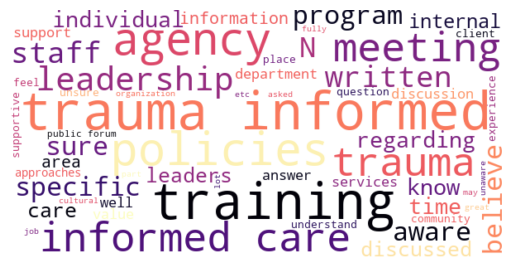

In [41]:
wc = WordCloud(width=600, height=300, background_color = "white", colormap = "magma", max_words=55)
wc.generate(comment_string)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

In [42]:
list(data["comment_category"].keys())

['Policy Review/Governance and Leadership',
 'Staff Development & TrainingStaff at all levels of the program receive training and education on the following topics:',
 'Supportive Environment',
 'The agency provides services that engage and are accessible and affirming to:',
 'The agency demonstrates respect for privacy and confidentiality by:',
 'Service Recipients Engagement',
 'Staff demonstrate open and respectful communication with all service recipients by:',
 'Staff show acceptance of cultural, ethnic, religious, linguistic and other differences.',
 'Services']

In [43]:
data["comment_category"]["Policy Review/Governance and Leadership"]

['Comment 1']

In [44]:
comment_df[data["comment_category"]["Policy Review/Governance and Leadership"][0]]

0                                                      
1                                                      
2     The importance of person centered care is ofte...
3                            unsure if it was discussed
4                                                      
                            ...                        
22                    Not yet for any written policies.
23    Trauma informed services training is a part of...
24                                                     
25    I am not sure what leadership discusses in the...
26                                                     
Name: Comment 1, Length: 204, dtype: object

In [45]:
import geocoder
import folium

In [46]:
g = geocoder.ip("216.54.0.107")
address = g.latlng
print(address)

[36.8468, -76.2852]


In [47]:
map = folium.Map(location=address, zoom_start=12)
map.save("map.html")

In [48]:
folium.CircleMarker(location=address, radius=50, popup="Location").add_to(map)

In [49]:
folium.Map(location=address, pop_up="Location").add_to(map)

g = geocoder.ip("216.54.0.107")
address = g.latlng

In [50]:
ip_df = result[["IP Address"]]
ip_df.reset_index(inplace=True, drop=True)
# ip_df["IP Address"] = ip_df["IP Address"].astype(str)
ip_df.head()

,IP Address
0,216.54.0.107
1,216.54.0.107
2,174.193.64.244
3,216.54.0.107
4,216.54.0.107


In [51]:
ip_df["location"] = None

In [56]:
geo_address = None
geo_string = ""
for i in range(len(ip_df)):
    geo_address = geocoder.ipinfo(ip_df.loc[i]["IP Address"])
    geo_string = ",".join(str(address) for address in geo_address)
    ip_df.loc[i, "location"]= geo_string
ip_df.head(5)

Status code 429 from http://ipinfo.io/216.54.0.107/json: ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io/216.54.0.107/json
Status code 429 from http://ipinfo.io/216.54.0.107/json: ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io/216.54.0.107/json
Status code 429 from http://ipinfo.io/174.193.64.244/json: ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io/174.193.64.244/json
Status code 429 from http://ipinfo.io/216.54.0.107/json: ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io/216.54.0.107/json
Status code 429 from http://ipinfo.io/216.54.0.107/json: ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io/216.54.0.107/json
Status code 429 from http://ipinfo.io/216.54.0.107/json: ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io/216.54.0.107/json
Status code 429 from http://ipinfo.io/216.54.0.107/json: ERROR - 429 Client Error: Too Many Requests for url: http://ipinfo.io

,IP Address,location
0,216.54.0.107,
1,216.54.0.107,
2,174.193.64.244,
3,216.54.0.107,
4,216.54.0.107,
